# Atelier Big Data : Olympic Summer & Winter games 1896 - 2022  

## Connexion à la base de données
Cette cellule établit une connexion à une base de données MariaDB en utilisant SQLAlchemy. Elle importe également les bibliothèques nécessaires pour la manipulation des données (`pandas`) et la visualisation (`matplotlib.pyplot`, `seaborn`). Une fonction `retrieve_data` est définie pour extraire les données d'une table spécifique de la base de données.


In [12]:
# Database connection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# récupérer les données d'une table spécifique
def retrieve_data(table_name):
    query = f"SELECT * FROM {table_name}"
    data = pd.read_sql(query, engine)
    return data

# Connexion à la base de données MariaDB
db_user = 'jo'
db_password = 'jo'
db_name = 'jo'
db_host = 'localhost'
db_port = '3311'

engine = create_engine(f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# récupérer les données des différentes tables
table_names = ['athletes', 'results', 'medals']

# Boucle pour récupérer et afficher les données de chaque table
for table in table_names:
    data = retrieve_data(table)
    print(f"Données de la table '{table}':")
    print(data.head())
    print("\n")

Données de la table 'athletes':
   id       athlete_full_name  games_participations        first_game  \
0   1  Cooper WOODS-TOPALOVIC                     1      Beijing 2022   
1   2          Felix ELOFSSON                     2  PyeongChang 2018   
2   3           Dylan WALCZYK                     1      Beijing 2022   
3   4           Olli PENTTALA                     1      Beijing 2022   
4   5        Dmitriy REIKHERD                     1      Beijing 2022   

   athlete_year_birth athlete_medals  
0              2000.0           None  
1              1995.0           None  
2              1993.0           None  
3              1995.0           None  
4              1989.0           None  

Données de la table 'results':
   id discipline_title    event_title rank_position   country_name  \
0   1          Curling  Mixed Doubles             1          Italy   
1   2          Curling  Mixed Doubles             2         Norway   
2   3          Curling  Mixed Doubles             3  

## Nombre d'athlètes français médaillés
Cette cellule exécute une requête SQL pour compter le nombre d'athlètes français distincts qui ont remporté des médailles dans l'histoire des Jeux Olympiques. Les résultats sont récupérés et affichés.


In [97]:
# Combien d’athlètes français ont été médaillés dans l’histoire des JO ?
queryFrenchMedals = '''
    SELECT COUNT(DISTINCT(athlete_full_name)) as french_medals 
    FROM medals 
    WHERE country_name="France";
'''
data_french_medals=pd.read_sql(queryFrenchMedals,engine)
print(data_french_medals)

   french_medals
0            569


## Les plus grands athlètes français
Cette cellule identifie les athlètes français les plus médaillés dans l'histoire des Jeux Olympiques. Elle utilise la fonction `retrieve_data` pour obtenir les données des médailles, puis trie et compte les médailles remportées par chaque athlète français. Une visualisation est également créée à l'aide de Seaborn pour représenter graphiquement ces données.


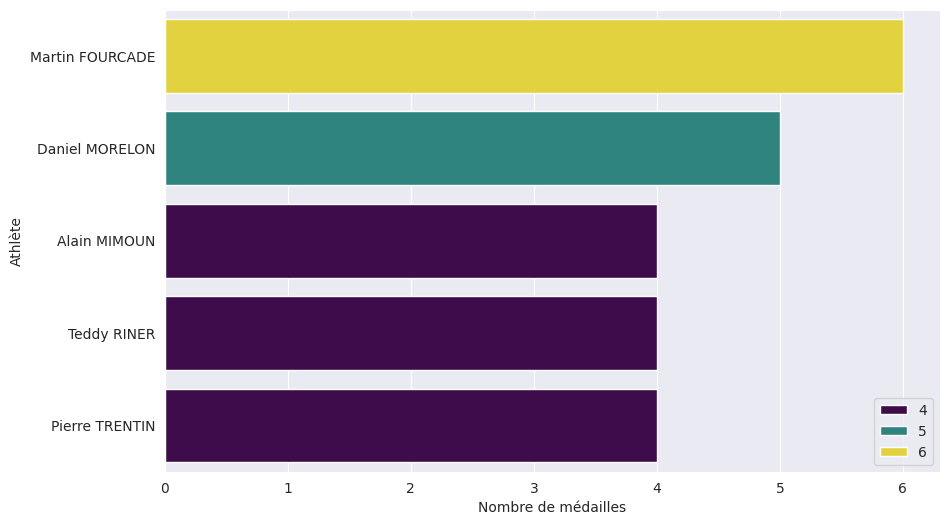

In [24]:
# Quels sont les plus grands athlètes français dans l’histoire des JO ?
french_medalists = retrieve_data('medals')
top_french_athletes = french_medalists[french_medalists['country_name'] == 'France']['athlete_full_name'].value_counts().head()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=top_french_athletes.values, y=top_french_athletes.index, hue=top_french_athletes.values, palette='viridis')
plt.title('')
plt.xlabel('Nombre de médailles')
plt.ylabel("Athlète")
plt.show()


## Classement de la France dans l'histoire des JO
Cette cellule calcule et affiche le classement moyen de la France dans l'histoire des Jeux Olympiques en utilisant la position moyenne des rangs obtenus dans les résultats.


In [96]:
# Comment se classe la France dans l’histoire des JO ?
queryFrancePosition = '''
    SELECT AVG(rank_position) 
    FROM results 
    WHERE country_name="France";
'''

data_french_position = pd.read_sql(queryFrancePosition, engine)
average_rank_position = int(data_french_position.iloc[0, 0])
print(average_rank_position)

15


## Pays les plus gagnants par discipline
Cette cellule exécute une requête SQL pour identifier les 10 pays ayant remporté le plus grand nombre de disciplines aux Jeux Olympiques. Elle affiche les résultats et crée une visualisation à barres pour illustrer ces données.


   number_of_win     discipline_title                country_name
0           1186     Freestyle Skiing    United States of America
1            473            Athletics                Soviet Union
2            341                 Luge                     Germany
3            337       Figure skating                      France
4            300              Curling               Great Britain
5            285     Freestyle Skiing  People's Republic of China
6            258              Curling                       Italy
7            210     Freestyle Skiing                      Norway
8            210              Curling                      Sweden
9            197  Gymnastics Rhythmic          Russian Federation


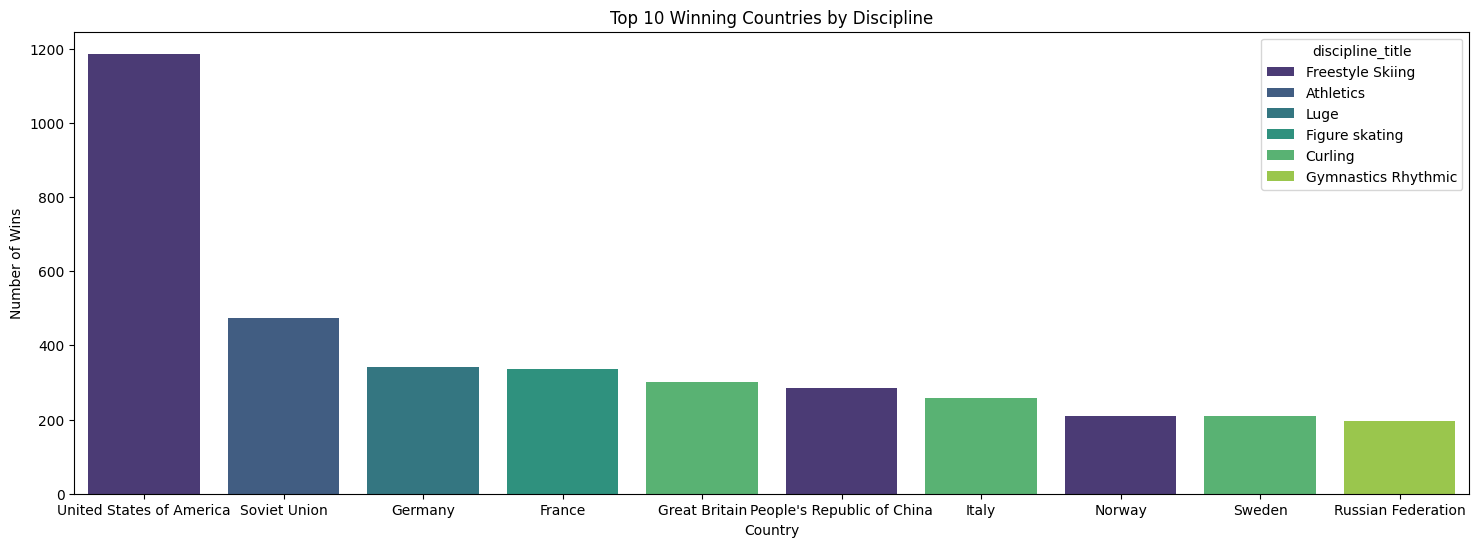

In [99]:
# Quels sont les pays qui ont le plus gagné par discipline ?
queryWiningCountriesByDiscipline = '''
    SELECT COUNT(country_name) as number_of_win, discipline_title, country_name 
    FROM results 
    WHERE rank_position = 1 
    GROUP BY country_name 
    ORDER BY COUNT(country_name) 
    DESC LIMIT 10;
'''
data_wining_country_by_discipline = pd.read_sql(queryWiningCountriesByDiscipline, engine)

print(data_wining_country_by_discipline)
plt.figure(figsize=(18, 6))
barplot = sns.barplot(data=data_wining_country_by_discipline, x='country_name', y='number_of_win', hue='discipline_title', palette='viridis')
barplot.set(title='Top 10 des pays avec le plus de victoires par disciplines', xlabel='Country', ylabel='Number of Wins')
plt.show()



## Athlètes avec le plus de médailles dans l'histoire des JO
Dans cette cellule, les données des médailles sont extraites et le nombre de médailles remportées par les athlètes est compté pour identifier les 5 meilleurs. Une visualisation est également créée pour afficher ces informations de manière graphique.


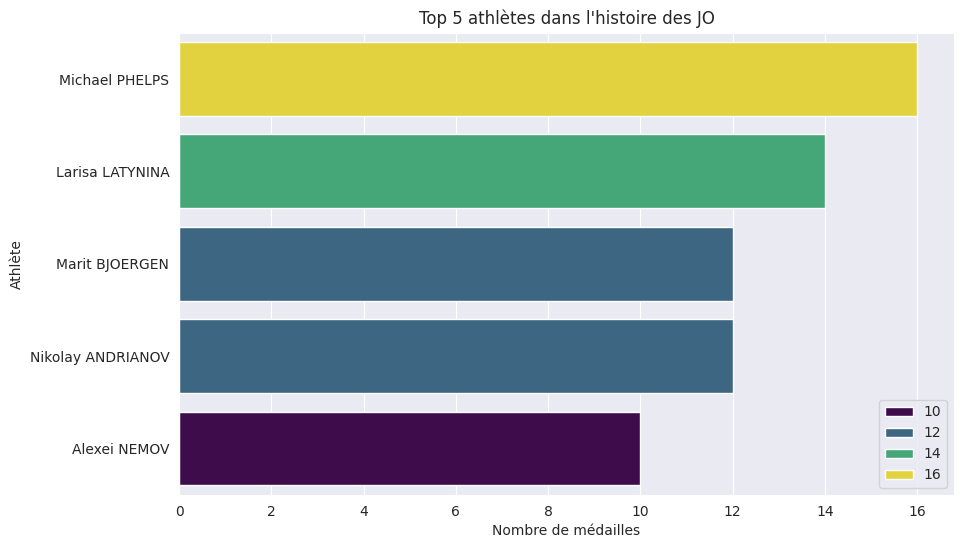

In [27]:
# Quels sont les athlètes qui ont le plus gagné de médailles dans l’histoire des JO ?
medals_data = retrieve_data('medals')
top_athletes_medals = medals_data['athlete_full_name'].value_counts().head()

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x=top_athletes_medals.values, y=top_athletes_medals.index, hue=top_athletes_medals.values, palette='viridis')
plt.title("Top 5 athlètes dans l'histoire des JO")
plt.xlabel('Nombre de médailles')
plt.ylabel('Athlète')
plt.show()